In [898]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline
sns.set()
sns.set_color_codes()

## Comparing GDP

### A. Total GDP (constant, mkt) data 

#### Tuesday

* Compare constat market data from IMF (IFS vs WEO) - choose one **<span style="color:lime; background:green;">In Progress</span>** for select countries
    * For WEO **<span style="color:white; background:limegreen;">DONE</span>**
    * For IFS - construct real gdp series in reference to same base year

* Construct xarray with other sources (PWT, UN, WB) 
    * For market based GDP **<span style="color:white; background:limegreen;">DONE</span>**
    * For PPP not done yet

* Compare country-by-country (top 10? or all mortality sector 
    how much does this contribute to total discrepancy?
 
 
* Compare aggregates (top 10 countries)

#### Wednesday 
* 5. Compare PWT values (rgpdna, rgpde, rgpdo)


* Construct xarray **<span style="color:white; background:maroon;">STARTED</span>**

---
Tips
* Compare/plot major countries 
    * mortality countries
        
    Brazil  1997-2009
    Chile 1997-2012
    EU (different spatial scale than others - NUTS2)
    France 1998-2012
    India 1957-2001
    Japan 1975-2012
    Mexico 1990-2012
    USA 1968-2013

    * Question - is discrepancy from the top 10 or others? (get a factor of gdp_top_10/gdp_total

* Compare with GDP (PPP)
* Compare with La Porta for Mortality countries




### Z. Convenience functions

In [899]:
def add_iso_column(_df, _country_name_col):
    # uses iso_map (global dict)
    _df['iso'] = _df[_country_name_col].apply(lambda name: iso_map[name] if iso_map.get(name) else name)
    return _df

def set_col_as_index(_df, _col_name):
    return _df.set_index(_col_name)

# country specific
def get_row_by_country_name(_df, country_name, col_name='country_name'):
    # Get country by name
    if col_name not in _df.columns:
        raise Exception('Column name {} does not exist!'.format(col_name))
    return _df[_df[col_name] == country_name]

# lets simplify
def label_axes(_ax, _x_label, _y_label, _title):
    _ax.set_xlabel(_x_label, fontsize=14)
    _ax.set_ylabel(_y_label, fontsize=14)
    _ax.set_title(_title, fontsize=14)

In [900]:
def drop_non_years(_df):
    def _is_year(_y):
        try:
            float(_y)
            return True
        except ValueError:
            return False
    return _df[[x for x in _df.columns if _is_year(x)]] 


def drop_years_not_in_1950_2016(_df):
    _cols = [y for y in range(1950, 2017)]
    return df[_cols]

In [901]:
# set year as columns name

In [902]:
def set_col_idx_name(_df, col_idx_name='year'):
    _df.columns.name = col_idx_name
    return _df

In [903]:
# update equivalence unit (make it bill or 100s of mil)
def make_df_single_country(_iso):
    '''
    Abstracting out what was done for Brazil. Need to test to see if this works
    
    _iso: String
       iso country code in three letters ex. CHN for China and BRA for Brazil
        
    '''
    assert cpwt.shape == cwb.shape == cimf.shape == cun.shape
    
    #pwt
    _pwt = df_pwt.loc[_iso][31:] * 10**6
    
    #wb
    _wb = df_wb.loc[_iso][21:56]
    
    # un
    _un = df_un.loc[_iso][31:66] * 10**3
    
    # imf
    _imf = df_imf.loc[_iso][1:36] * 10**6

    return pd.DataFrame({'pwt': _pwt, 
                   'wb': _wb, 
                   'un': _un,
                   'imf': _imf})

### X. Convenience Functions (ISO)


In [904]:
rhg_regions = dir_path + 'data/meta_data/iso_map_based_on_rhg_regions.xls'
iso = pd.read_excel(rhg_regions)

# rhg_regions file updated to include Syria and Kosovo
iso_map = iso[['country_name', 'iso']].set_index('country_name').to_dict()['iso']

### Y. Download data (PWT, IMF, WB) - real market

In [905]:
dir_path = os.environ['ZERG']

pwt = dir_path + 'data/pwt/pwt90.xlsx'
wb = dir_path + 'data/wb/gdp/gdp_constant/API_NY.GDP.MKTP.KD_DS2_en_csv_v2.csv'
imf = dir_path + 'data/imf/WEOOct2017all.xls'

### A. Total GDP, real mkt

### Data prepping:

In [906]:
# 1.WEO data (4 countries only for comparison with IFS)

In [907]:
imf_sub = dir_path + 'data/imf/weo_oct_2017_sub.xls'

In [908]:
df_imf_sub = pd.read_excel(imf_sub)
df_imf_real_mkt = df_imf_sub[df_imf_sub['Type']=='gdp_real_mkt']

In [909]:
df_imf_mod = drop_non_years(set_col_as_index(df_imf_real_mkt, 'ISO'))
df_imf_mod.columns = df_imf_mod.columns.to_series().apply(lambda x: int(x))

In [910]:
historical_years = [x for x in range(1980,2017)] # not forecasts
df_imf_hist = df_imf_mod[historical_years]

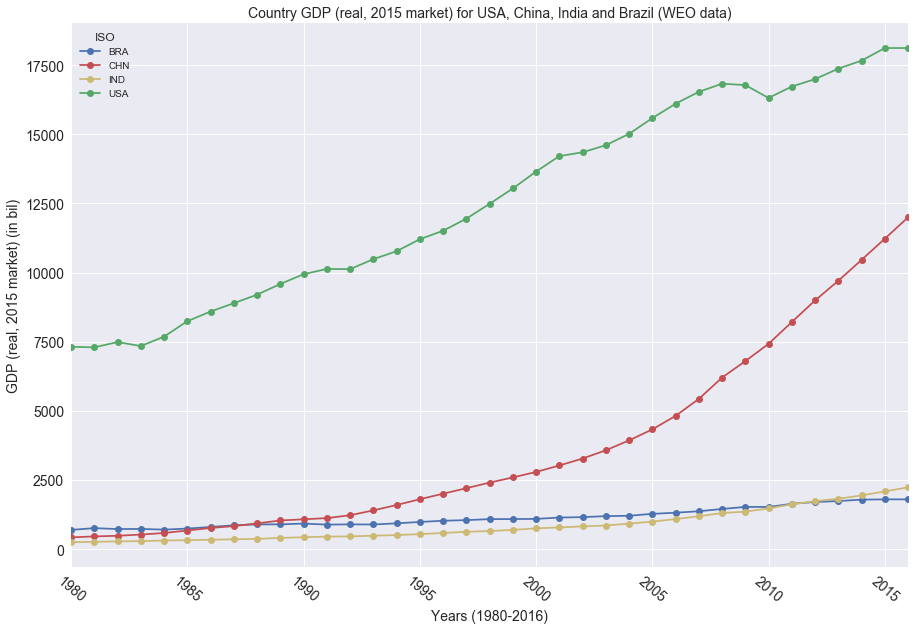

In [911]:
a = df_imf_hist.T.plot(style=['bo-','ro-', 'yo-', 'go-'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

label_axes(a, 
           'Years (1980-2016)', 
           'GDP (real, 2015 market) (in bil)', 
           'Country GDP (real, 2015 market) for USA, China, India and Brazil (WEO data)')

In [912]:
# Country GDP using IMF IFS
# waiting on IFS data subset
# this is painful - IFS has lot of issues
dir_path
'/Users/mlimb/Downloads/IFS_12-29-2017 19-25-04-10_timeSeries/ifs_test_file2.csv'


'/Users/mlimb/Downloads/IFS_12-29-2017 19-25-04-10_timeSeries/ifs_test_file2.csv'

In [913]:
filepath_ifs_real_gdp = '/Users/mlimb/Dropbox/covariate_project/zerg/data/imf/ifs/ifs_real_gdp_sub.xls'
filepath_ifs_ex_rate = '/Users/mlimb/Dropbox/covariate_project/zerg/data/imf/ifs/ifs_exchange_rate_sub.xls'

In [914]:
# real gdp: sheetname: gdp_real_spliced_historical_dcu
# dcu is for domestic currency unit

In [915]:
df_real_gdp = pd.read_excel(filepath_ifs_real_gdp, sheetname='gdp_real_spliced_historical_dcu')

In [916]:
df_ex_rate = pd.read_excel(filepath_ifs_ex_rate, sheetname='exchange_rate_avg')

In [917]:
df_real_gdp_iso = set_col_as_index(df_real_gdp, 'iso')
df_ex_rate_iso = set_col_as_index(df_ex_rate, 'iso')

In [918]:
#plot GDP in DCU first

In [919]:
df_real_gdp_years = drop_non_years(df_real_gdp_iso)
df_real_gdp_final = df_real_gdp_years.astype(float)

In [920]:
# exchange rate: avg is for period average exchange rate vs end of period (eop?)
# this is kinda slow

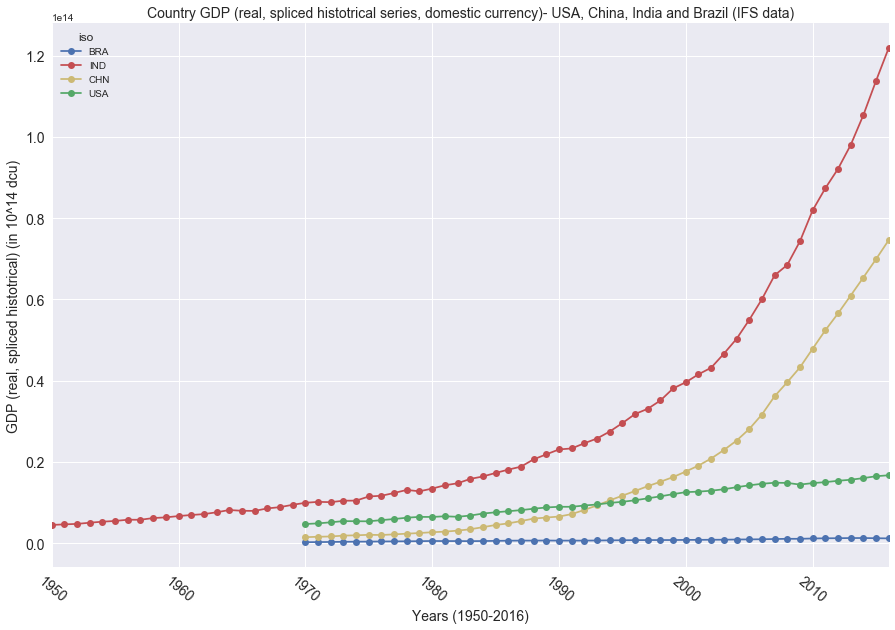

In [921]:
a = df_real_gdp_final.T.plot(style=['bo-','ro-', 'yo-', 'go-'], 
                       figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

#Gross Domestic Product, Real, Spliced Historical Series, Domestic Currency
# DCU for domestic currency unit
label_axes(a, 
           'Years (1950-2016)', 
           'GDP (real, spliced histotrical) (in 10^14 dcu)', 
           'Country GDP (real, spliced histotrical series, domestic currency)' +
           '- USA, China, India and Brazil (IFS data)')

In [922]:
# Take dot product of exchange rate and DCU gdp series to get GDP series in dollars!

In [923]:
df_ex_rate_final = drop_non_years(df_ex_rate_iso)

In [924]:
df_dotted = df_real_gdp_final.multiply(df_ex_rate_final, fill_value=np.nan)

In [925]:
df_dotted.loc['BRA']

1950             NaN
1951             NaN
1952             NaN
1953             NaN
1954             NaN
1955             NaN
1956             NaN
1957             NaN
1958             NaN
1959             NaN
1960             NaN
1961             NaN
1962             NaN
1963             NaN
1964             NaN
1965             NaN
1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970    1.184127e+23
1971    1.155295e+23
1972    1.140388e+23
1973    1.253441e+23
1974    1.244429e+23
1975    1.083505e+23
1976    9.101104e+22
1977    7.167883e+22
1978    5.888780e+22
1979    4.322694e+22
            ...     
1987    4.605557e+19
1988    8.571368e+18
1989    9.353504e+17
1990    3.160191e+16
1991    4.506313e+15
1992    5.068863e+14
1993    3.865815e+13
1994    1.423550e+12
1995    7.873266e+11
1996    7.334463e+11
1997    7.071018e+11
1998    6.591078e+11
1999    4.257625e+11
2000    4.388186e+11
2001    3.497975e+11
2002    2.962466e+11
2003    2.770

In [926]:
df_real_gdp_in_bil = df_dotted.divide(10**9)
df_real_gdp_in_bil.loc['BRA']
df_real_gdp_no_brazil = df_real_gdp_in_bil.drop(['BRA'])

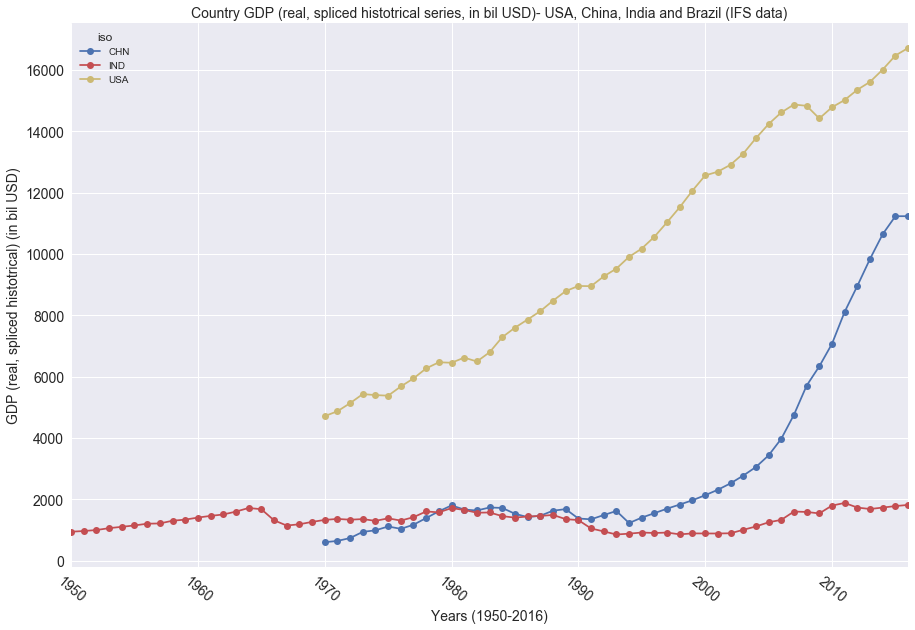

In [927]:
a2 = df_real_gdp_no_brazil.T.plot(style=['bo-','ro-', 'yo-', 'go-'], 
                       figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

#Gross Domestic Product, Real, Spliced Historical Series, Domestic Currency
# DCU for domestic currency unit
label_axes(a2, 
           'Years (1950-2016)', 
           'GDP (real, spliced histotrical) (in bil USD)', 
           'Country GDP (real, spliced histotrical series, in bil USD)' +
           '- USA, China, India and Brazil (IFS data)')

### To compare IFS data, construct real GDP series with same reference year

Given:  
        real gdp series in LCU (local currency unit)
        
        nominal gdp series in LCU (calculated using gdp deflator)
        
       $$gdp_{ri2} = \frac{gdp_{ri1}}{gdp_{rb1}} * gdp_{ni}$$

        
        exchange rate (USD/LCU)
     
        $$gdp_{ni} = \frac{gdp_{ri}}{100} * gdp_deflator$$
        
    where r = real
          n = nomina
          i = integer year
          b = old base year
          1 = with reference to old base year
          2 = with reference to new base year
          all units are in LCU.

       
       

### Download other data

In [928]:
# Open other data

In [929]:
os.listdir(dir_path + 'data/un/national_accounts')

['.DS_Store',
 'Download-GDPconstant-NCU-countries.xls',
 'Download-GDPconstant-USD-all.xls',
 'Download-GDPconstant-USD-countries.xls',
 'Download-GDPgrowth-USD-countries.xls',
 'Download-GDPPCconstant-USD-countries.xls']

In [930]:
wb = dir_path + 'data/combined_data/wb_gdp_mkt_constant.csv' # constant, market
un = dir_path + 'data/un/national_accounts/Download-GDPconstant-USD-countries.xls' # market, constant

In [931]:
un = dir_path+ 'data/un/munged/un_na_real_gdp_2005.csv' # is this correct one?

In [932]:
# pwt has all data in one file
# do pwt later since it's all PPP based
pwt = dir_path + 'data/pwt/pwt90.xlsx'
df_pwt = pd.read_excel(pwt, sheetname='Data')

In [933]:
# WB has separate files for each (real market) - or at least this is an option
df_wb = pd.read_csv(wb)

# UN has three tabs
df_un = pd.read_csv(un)
# indicator we are interested in is Gross Domestic Product (GDP)

In [934]:
df_un

,Unnamed: 0,Country,IndicatorName,1970,1971,1972,1973,1974,1975,1976,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,Afghanistan,Gross Domestic Product (GDP),6.929847e+09,6.910741e+09,5.777295e+09,5.944597e+09,6.268757e+09,6.657749e+09,7.021806e+09,...,7.228470e+09,8.391843e+09,8.587560e+09,1.006676e+10,1.039254e+10,1.129470e+10,1.252919e+10,1.334057e+10,1.362811e+10,1.329954e+10
1,1,Albania,Gross Domestic Product (GDP),3.169870e+09,3.296691e+09,3.429017e+09,3.566792e+09,3.708417e+09,3.858726e+09,4.014230e+09,...,8.527360e+09,9.037573e+09,9.715399e+09,1.004128e+10,1.041350e+10,1.067857e+10,1.082991e+10,1.095041e+10,1.117179e+10,1.146665e+10
2,2,Algeria,Gross Domestic Product (GDP),2.892192e+10,2.616777e+10,3.199046e+10,3.337282e+10,3.463035e+10,3.664808e+10,3.891613e+10,...,1.049526e+11,1.085210e+11,1.111255e+11,1.129035e+11,1.169680e+11,1.203601e+11,1.244523e+11,1.279370e+11,1.327986e+11,1.378449e+11
3,3,Andorra,Gross Domestic Product (GDP),8.849485e+08,9.260940e+08,1.001568e+09,1.079575e+09,1.140234e+09,1.146416e+09,1.184292e+09,...,3.403399e+09,3.404760e+09,3.112291e+09,2.997427e+09,2.836800e+09,2.704987e+09,2.661296e+09,2.670654e+09,2.731483e+09,2.754488e+09
4,4,Angola,Gross Domestic Product (GDP),1.581916e+10,1.676831e+10,1.680184e+10,1.816279e+10,1.872584e+10,1.778955e+10,1.686449e+10,...,4.124020e+10,4.701484e+10,5.226445e+10,5.252605e+10,5.501734e+10,5.692753e+10,6.179036e+10,6.485182e+10,6.750589e+10,6.953577e+10
5,5,Anguilla,Gross Domestic Product (GDP),3.116523e+07,3.038654e+07,3.389268e+07,3.530909e+07,3.523788e+07,3.644360e+07,3.700876e+07,...,2.755762e+08,3.123323e+08,3.077939e+08,2.511355e+08,2.399510e+08,2.497567e+08,2.341308e+08,2.327161e+08,2.446690e+08,2.518859e+08
6,6,Antigua and Barbuda,Gross Domestic Product (GDP),2.354170e+08,2.530182e+08,2.717196e+08,2.948213e+08,3.048557e+08,2.881316e+08,2.623288e+08,...,1.144947e+09,1.251309e+09,1.251905e+09,1.101231e+09,1.023686e+09,1.005635e+09,1.044226e+09,1.042137e+09,1.090104e+09,1.135093e+09
7,7,Argentina,Gross Domestic Product (GDP),1.051289e+11,1.090839e+11,1.113495e+11,1.155202e+11,1.217648e+11,1.210423e+11,1.210279e+11,...,2.177859e+11,2.374209e+11,2.471406e+11,2.322792e+11,2.563284e+11,2.720861e+11,2.692214e+11,2.754202e+11,2.683736e+11,2.747402e+11
8,8,Armenia,Gross Domestic Product (GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.915695e+09,6.729056e+09,7.196569e+09,6.178256e+09,6.315110e+09,6.608811e+09,7.082349e+09,7.313073e+09,7.579425e+09,7.807966e+09
9,9,Aruba,Gross Domestic Product (GDP),2.061550e+08,2.248913e+08,2.453305e+08,2.676273e+08,2.919506e+08,3.184844e+08,3.474298e+08,...,2.355605e+09,2.403476e+09,2.406800e+09,2.134206e+09,2.062401e+09,2.135536e+09,2.106282e+09,2.194709e+09,2.213325e+09,2.215320e+09


In [935]:
del df_wb['Unnamed: 0']
del df_un['Unnamed: 0']

In [936]:
df_wb.shape # countries only

(217, 59)

In [937]:
df_un.columns[()]
df_un = df_un[df_un['IndicatorName'].str.startswith('Gross Domestic Product')] #get only GDP indicator

In [938]:
df_un.to_csv(dir_path +'/data/un/munged/un_national_acct_real_gdp_2005.csv')
df_un.to_csv(dir_path +'/data/un/munged/un_na_real_gdp_2005.csv')

In [939]:
get_row_by_country_name(df_wb, 'Kosovo', 'Country Name')

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
212,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.319987e+09,5.460691e+09,5.643169e+09,5.829934e+09,6.099252e+09,6.270547e+09,6.486283e+09,6.565321e+09,6.832951e+09,7.065142e+09


Notes

##### WB
* df_wb is GDP constant 2010 USD (indicator is NY.GDP.MKTP.KD)

* years: 1960- 2017

##### UN NA Main Aggregates
* constant 2005 

* years: 1970 - 2015

## Create Multi-Index of 4 Data sets to convert to xarray

Restructure pd dataframe so these are indexes

    country_code
    year
    source

cols as variable names
index as dimensions

    0. Add/set iso as index [x]

    1. Each df drop everything that's not a year [x]
    
country_name is meta data to country_code -> let's drop country_name (easiet)

    2. Set the name of the columns to be quote 'year' [x]

`df.column.name = 'year'` set column index

    3. `df.stack('year')` -> will return series (with two indices iso and year) with single value for iso-year combo

    4. pd.concat(
        {
            'wb': serires,
            'pwt': ..,
        }, axis=0, names=['source'])

names -> name of resulting index

#join all series along 0 axis

### add iso column

In [940]:
def add_iso_column(_df, _country_name_col):
    if 'Country Code'in _df.columns:
        _df['iso'] = _df['Country Code']
    else:
        # uses iso_map (global dict)
        _df['iso'] = _df[_country_name_col].apply(lambda name: iso_map[name] if iso_map.get(name) else name)
    return _df

In [941]:
df_un.columns

Index(['Country', 'IndicatorName', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [942]:
df_wb_iso = set_col_as_index(add_iso_column(df_wb, 'Country Name'), 'iso')
df_un_iso = set_col_as_index(add_iso_column(df_un, 'Country'), 'iso')

In [943]:
iso_map.get('Afghanistan')

'AFG'

### drop non years

In [944]:
df_wb_yr = drop_non_years(df_wb_iso)
df_un_yr = drop_non_years(df_un_iso)

### set column value types as int

In [945]:
df_wb_yr.columns = df_wb_yr.columns.astype(int)
df_un_yr.columns = df_un_yr.columns.astype(int)

### Set name of cols as year
### then stack year s

In [946]:
all_df = [df_wb_yr, df_un_yr]

In [947]:
[wb_source, un_source] = [set_col_idx_name(_df) for _df in all_df]

In [948]:
### convert units
# not needed for GDP data it seems!

In [949]:
### stack year

In [950]:
def stack_year(_df):
    return _df.stack('year')

#`df.stack('year')` -> will return series (with two indices iso and year) with single value for iso-year combo

#### Data prepping (PWT):

    1) rename columns (countrycode->iso and country-> country_name) to enforce consistency across munged data sources
    
    2) get subset of PWT raw data using columns of interest (real gdp, country name/iso, pop

    3) set iso column as the index

In [951]:
### concat all munged multindex sources

In [952]:
un_source

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
iso,,,,,,,,,,,,,,,,,,,,,
AFG,6.929847e+09,6.910741e+09,5.777295e+09,5.944597e+09,6.268757e+09,6.657749e+09,7.021806e+09,6.667723e+09,7.161444e+09,6.976922e+09,...,7.228470e+09,8.391843e+09,8.587560e+09,1.006676e+10,1.039254e+10,1.129470e+10,1.252919e+10,1.334057e+10,1.362811e+10,1.329954e+10
ALB,3.169870e+09,3.296691e+09,3.429017e+09,3.566792e+09,3.708417e+09,3.858726e+09,4.014230e+09,4.167939e+09,4.347230e+09,4.519385e+09,...,8.527360e+09,9.037573e+09,9.715399e+09,1.004128e+10,1.041350e+10,1.067857e+10,1.082991e+10,1.095041e+10,1.117179e+10,1.146665e+10
DZA,2.892192e+10,2.616777e+10,3.199046e+10,3.337282e+10,3.463035e+10,3.664808e+10,3.891613e+10,4.257909e+10,4.691110e+10,5.041904e+10,...,1.049526e+11,1.085210e+11,1.111255e+11,1.129035e+11,1.169680e+11,1.203601e+11,1.244523e+11,1.279370e+11,1.327986e+11,1.378449e+11
AND,8.849485e+08,9.260940e+08,1.001568e+09,1.079575e+09,1.140234e+09,1.146416e+09,1.184292e+09,1.217909e+09,1.235727e+09,1.236240e+09,...,3.403399e+09,3.404760e+09,3.112291e+09,2.997427e+09,2.836800e+09,2.704987e+09,2.661296e+09,2.670654e+09,2.731483e+09,2.754488e+09
AGO,1.581916e+10,1.676831e+10,1.680184e+10,1.816279e+10,1.872584e+10,1.778955e+10,1.686449e+10,1.699941e+10,1.609844e+10,1.614673e+10,...,4.124020e+10,4.701484e+10,5.226445e+10,5.252605e+10,5.501734e+10,5.692753e+10,6.179036e+10,6.485182e+10,6.750589e+10,6.953577e+10
AIA,3.116523e+07,3.038654e+07,3.389268e+07,3.530909e+07,3.523788e+07,3.644360e+07,3.700876e+07,3.707850e+07,3.984018e+07,4.362957e+07,...,2.755762e+08,3.123323e+08,3.077939e+08,2.511355e+08,2.399510e+08,2.497567e+08,2.341308e+08,2.327161e+08,2.446690e+08,2.518859e+08
ATG,2.354170e+08,2.530182e+08,2.717196e+08,2.948213e+08,3.048557e+08,2.881316e+08,2.623288e+08,2.814420e+08,2.913732e+08,3.227627e+08,...,1.144947e+09,1.251309e+09,1.251905e+09,1.101231e+09,1.023686e+09,1.005635e+09,1.044226e+09,1.042137e+09,1.090104e+09,1.135093e+09
ARG,1.051289e+11,1.090839e+11,1.113495e+11,1.155202e+11,1.217648e+11,1.210423e+11,1.210279e+11,1.287570e+11,1.246079e+11,1.333518e+11,...,2.177859e+11,2.374209e+11,2.471406e+11,2.322792e+11,2.563284e+11,2.720861e+11,2.692214e+11,2.754202e+11,2.683736e+11,2.747402e+11
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.915695e+09,6.729056e+09,7.196569e+09,6.178256e+09,6.315110e+09,6.608811e+09,7.082349e+09,7.313073e+09,7.579425e+09,7.807966e+09


In [953]:
wb_source.index

Index(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       ...
       'VGB', 'VIR', 'VNM', 'VUT', 'WSM', 'XKX', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='iso', length=217)

In [954]:
# order is: 'wb', 'un'

combined = pd.concat({
#     'pwt': stack_year(pwt_source),
#     'imf': stack_year(imf_source),
    'wb': stack_year(wb_source),
    'un': stack_year(un_source)}, axis=0, names=['source'])

In [955]:
final = combined[combined.index.get_level_values('iso') != 'Total']
final = final[np.in1d(final.index.get_level_values('iso'), ['Total', 'World', np.nan, 'nan'], invert=True)]
final = final[~pd.isnull(final.index.get_level_values('iso'))]

In [956]:
#print(final.index.get_level_values('iso').unique().tolist())

# all values in each row of df

da = final.to_xarray()

In [957]:
da.isnull().any(dim='source')

<xarray.DataArray (iso: 249, year: 57)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ..., False, False,  True],
       ..., 
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)
Coordinates:
  * iso      (iso) object 'ABW' 'AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' ...
  * year     (year) int64 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...

In [958]:
# 2010 data for countries with complete coverage across all datasets
complete_coverage_2010 = da.sel(iso=da.iso[~da.sel(year=2010).isnull().any(dim='source')], year=2010)
complete_coverage_2010

<xarray.DataArray (source: 2, iso: 174)>
array([[  2.062401e+09,   1.039254e+10,   5.501734e+10, ...,   3.002665e+11,
          1.264745e+10,   9.573280e+09],
       [  2.467704e+09,   1.593680e+10,   8.247091e+10, ...,   3.753494e+11,
          2.026556e+10,   1.005205e+10]])
Coordinates:
  * source   (source) object 'un' 'wb'
  * iso      (iso) object 'ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' ...
    year     int64 2010

In [959]:
complete_coverage_2010.var(dim='source').argmax(dim='iso') 

<xarray.DataArray ()>
array(165)
Coordinates:
    year     int64 2010

In [960]:
complete_coverage_2010.isel(
    iso=complete_coverage_2010.var(dim='source').argmax(dim='iso'))

<xarray.DataArray (source: 2)>
array([  1.359926e+13,   1.496437e+13])
Coordinates:
  * source   (source) object 'un' 'wb'
    iso      <U3 'USA'
    year     int64 2010

#### 1. Rename columns for name consistency across sources

In [961]:
# df_pwt_renamed = df_pwt_real_m.rename(index=str, columns={'countrycode': 'iso', 'country': 'country_name'})

In [962]:
un_source.nlargest(1, 2010)

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
iso,,,,,,,,,,,,,,,,,,,,,
USA,4.339695e+12,4.482552e+12,4.717856e+12,4.984067e+12,4.958311e+12,4.948468e+12,5.215048e+12,5.455411e+12,5.758786e+12,5.941657e+12,...,1.344289e+13,1.368198e+13,1.364208e+13,1.326344e+13,1.359926e+13,1.381704e+13,1.412434e+13,1.436125e+13,1.470168e+13,1.508336e+13


In [963]:
da.year

<xarray.DataArray 'year' (year: 57)>
array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
Coordinates:
  * year     (year) int64 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...

In [964]:
da.sel(year=2015, iso='CHN').min(dim='source')  / da.sel(year=2005, iso='CHN').max(dim='source')

<xarray.DataArray ()>
array(2.495424944520402)
Coordinates:
    iso      <U3 'CHN'

In [965]:
# sounds about right
da.sel(year=2016, iso='CHN').min(dim='source')  / da.sel(year=1960, iso='CHN').max(dim='source')

<xarray.DataArray ()>
array(74.29494248939162)
Coordinates:
    iso      <U3 'CHN'

In [966]:
# sounds about right (comparison with WB time series
da.sel(year=2016, iso='USA').min(dim='source')  / da.sel(year=1960, iso='USA').max(dim='source')

<xarray.DataArray ()>
array(5.4792768544835395)
Coordinates:
    iso      <U3 'USA'

### timeseries comparison of china for un vs wb

In [967]:
china

source,un,wb
year,,
1960,NaN,1.279381e+11
1961,NaN,9.304941e+10
1962,NaN,8.785725e+10
1963,NaN,9.690655e+10
1964,NaN,1.145242e+11
1965,NaN,1.339360e+11
1966,NaN,1.482002e+11
1967,NaN,1.396490e+11
1968,NaN,1.339234e+11


Text(0.5,1,'Total Population (1980-2014) from different sources')

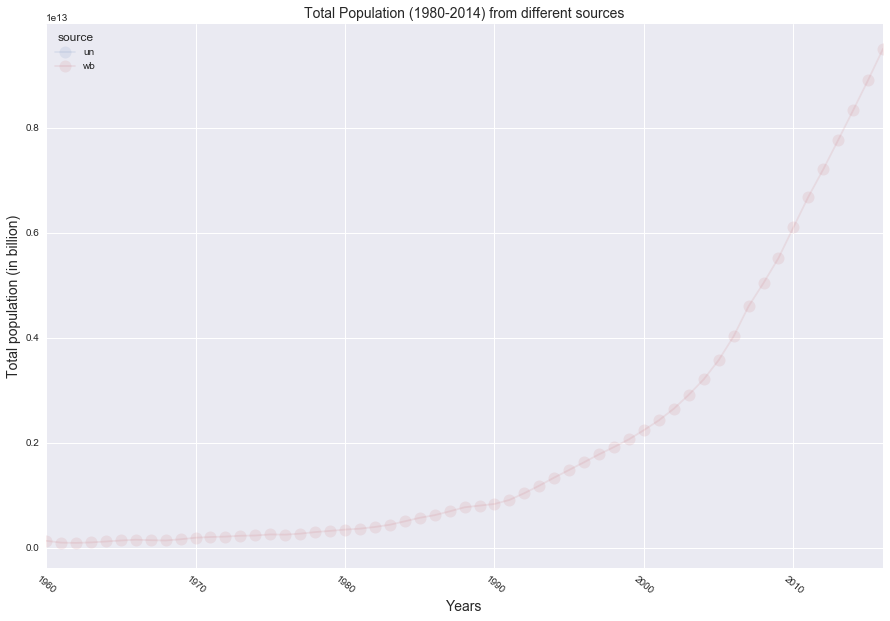

In [968]:
china = da.sel(iso='CHN').to_series().unstack('source')
chn = china.plot(style=['bo-','ro-'], figsize=(15,10), grid=True, rot=320, alpha=.1, ms=12)

chn.set_xlabel('Years', fontsize=14)
chn.set_ylabel('Total population (in billion)', fontsize=14)
chn.set_title('Total Population (1980-2014) from different sources', fontsize=14)


#### 2. Get a subset of PWT data (only columns related to gdp, plus iso and pop)

In [969]:
gdp_cols = ['iso', 'rgdpna', 'rgdpe', 'rgdpo', 'pop']

In [970]:
df_pwt_sub = df_pwt_renamed[gdp_cols]

NameError: name 'df_pwt_renamed' is not defined

#### 3. Set iso as index

In [ ]:
df_pwt_iso = set_iso_as_index(df_pwt_sub, 'iso')
# df_pwt_iso

In [ ]:
df_pwt_iso['rgdpe']

### MAP country name to country code

In [ ]:
pop_imf['country_code'] = pop_imf['country_name'].apply(lambda name: iso_map[name] if iso_map.get(name) else name)

In [ ]:
# imf data doesn't provide country code so needs manual mapping
imf_countries = pop_imf['country_code']

In [ ]:
[print(country) for country in pop_imf['country_code'].tolist() if len(country) > 3]

In [ ]:
pwt_set = set(pwt_countries)
un_set = set(un_countries)
wb_set = set(wb_countries)
imf_set = set(imf_countries)

In [ ]:
ls = {
    'pwt': pwt_set,
    'un': un_set,
    'wb': wb_set,
    'imf': imf_set
}

for k,v in ls.items():
    print ('{} has {} countries'.format(k,len(v)))

# pwt compare

In [ ]:
countries_in_un_not_wb = ls['un'] - ls['wb']
sorted([iso_map_rev[c] for c in countries_in_un_not_wb])

#### Rename cols

In [ ]:
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    if type(_df.index) != pd.core.indexes.numeric.Float64Index:
        _df.index = _df.index.map(float)
        
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    print (type(_df.index))

### Get only years 1980-2014

In [ ]:
cols_of_interest = ['country_name']
years = [str(y) for y in range(1980, 2015)]
cols_of_interest.extend(years)

In [ ]:
ds = [df_pwt, df_wb, df_un, df_imf]

In [ ]:
## Convert imf years from int to str (to be consistent with other datasets)
df_imf.columns = map(str, df_imf.columns)
df_imf.columns

In [ ]:
for dd in ds:
    print(dd[cols_of_interest].shape)

In [ ]:
# WB Total
df_wb
df_wb.loc['Total'] = df_wb.iloc[:, 1:].sum()
wb_total = df_wb[cols_for_total].loc['Total']
wb_total.to_dict()

### c) IMF Total

In [ ]:
imf_total = get_row_by_country_name(df_imf, 'Total').reset_index()[cols_for_total]
imf_total

### d) UN total

In [ ]:
un_total =df_un[cols_of_interest].iloc[:, 1:].sum()
un_total.to_dict() # pd.Series

In [ ]:
imf_total = imf_total.loc[0] # convert to series

In [ ]:
df_pop_total = pd.DataFrame({
    'un': un_total* 10**3,
    'wb': wb_total,
    'imf': imf_total*10**6,
    'pwt': pwt_total.loc[0]*10**6
})

df_pop_total.to_csv('munged_data/total_population_all_sources.csv')

In [ ]:
plt.close()

a = df_pop_total.plot(style=['bo-','ro-', 'yo-', 'go-'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')
# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')

type(a)
a.set_xlabel('Years', fontsize=14)
a.set_ylabel('Total population (in billion)', fontsize=14)
a.set_title('Total Population (1980-2014) from different sources', fontsize=14)
#a.grid(False)

# arr = np.arange(100).reshape((10,10))

# plt.close('all')
# fig = plt.figure(figsize=(5,4))

# ax = plt.subplot(111)
# im = ax.imshow(arr, interpolation="none")

# plt.tight_layout()


#### Why does WB have higher population than others? (verify summing process was correct)

### Compare growth rate values of total population

### Calculate percent change!


In [ ]:
# calculate percent change!
    
print(df_pop_total['wb'].pct_change().tolist())

In [ ]:
test = df_pop_total['wb'].head()
(test[2]-test[1])*1.0 / test[1]
pct_del = lambda _s, idx: (_s[idx]-_s[idx-1]*1.0)/_s[idx-1]
print(pct_del(test,3))
print(pct_del(test,2))
print(pct_del(test,1))